<a href="https://colab.research.google.com/github/gulabpatel/YOLOs/blob/main/Supervision/01_supervision_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install supervision ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 9.8 MB/s eta 0:00:00


In [2]:
import cv2
from ultralytics import YOLO
import supervision as sv

In [17]:
model = YOLO("yolov8n.pt")
image = cv2.imread("/content/mj-eySzBaaIHAw-unsplash.jpg")
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)


0: 640x512 7 persons, 8 cars, 1 bus, 1 traffic light, 240.1ms
Speed: 7.4ms preprocess, 240.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


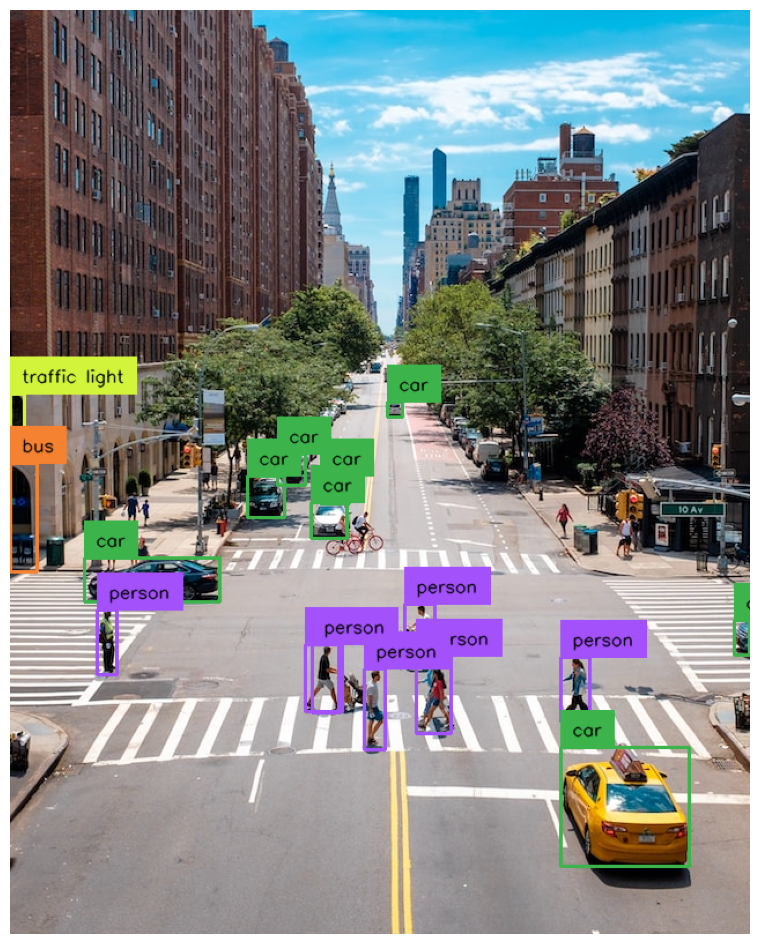

In [18]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    results.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)

annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)
sv.plot_image(annotated_image)

In [3]:
import numpy as np
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1K15ijbTl78VSOPjfvGSgvqh7ME2U7cG2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1K15ijbTl78VSOPjfvGSgvqh7ME2U7cG2" -O video.mp4 && rm -rf /tmp/cookies.txt


--2023-12-29 06:54:41--  https://docs.google.com/uc?export=download&confirm=t&id=1K15ijbTl78VSOPjfvGSgvqh7ME2U7cG2
Resolving docs.google.com (docs.google.com)... 173.194.215.102, 173.194.215.101, 173.194.215.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vps2trgcfc5punnfp7jefrof3vqmlp0o/1703832825000/03796184128890941253/*/1K15ijbTl78VSOPjfvGSgvqh7ME2U7cG2?e=download&uuid=24642d97-5db5-4037-905b-aea1dab12a12 [following]
--2023-12-29 06:54:44--  https://doc-0g-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vps2trgcfc5punnfp7jefrof3vqmlp0o/1703832825000/03796184128890941253/*/1K15ijbTl78VSOPjfvGSgvqh7ME2U7cG2?e=download&uuid=24642d97-5db5-4037-905b-aea1dab12a12
Resolving doc-0g-74-docs.googleusercontent.com (doc-0g-74-docs.googleusercontent.com)... 74.125.26.13

In [5]:
VIDEO = "/content/video.mp4"

colors = sv.ColorPalette.default()
video_info = sv.VideoInfo.from_video_path(VIDEO)
video_info

VideoInfo(width=1920, height=1080, fps=29, total_frames=1275)

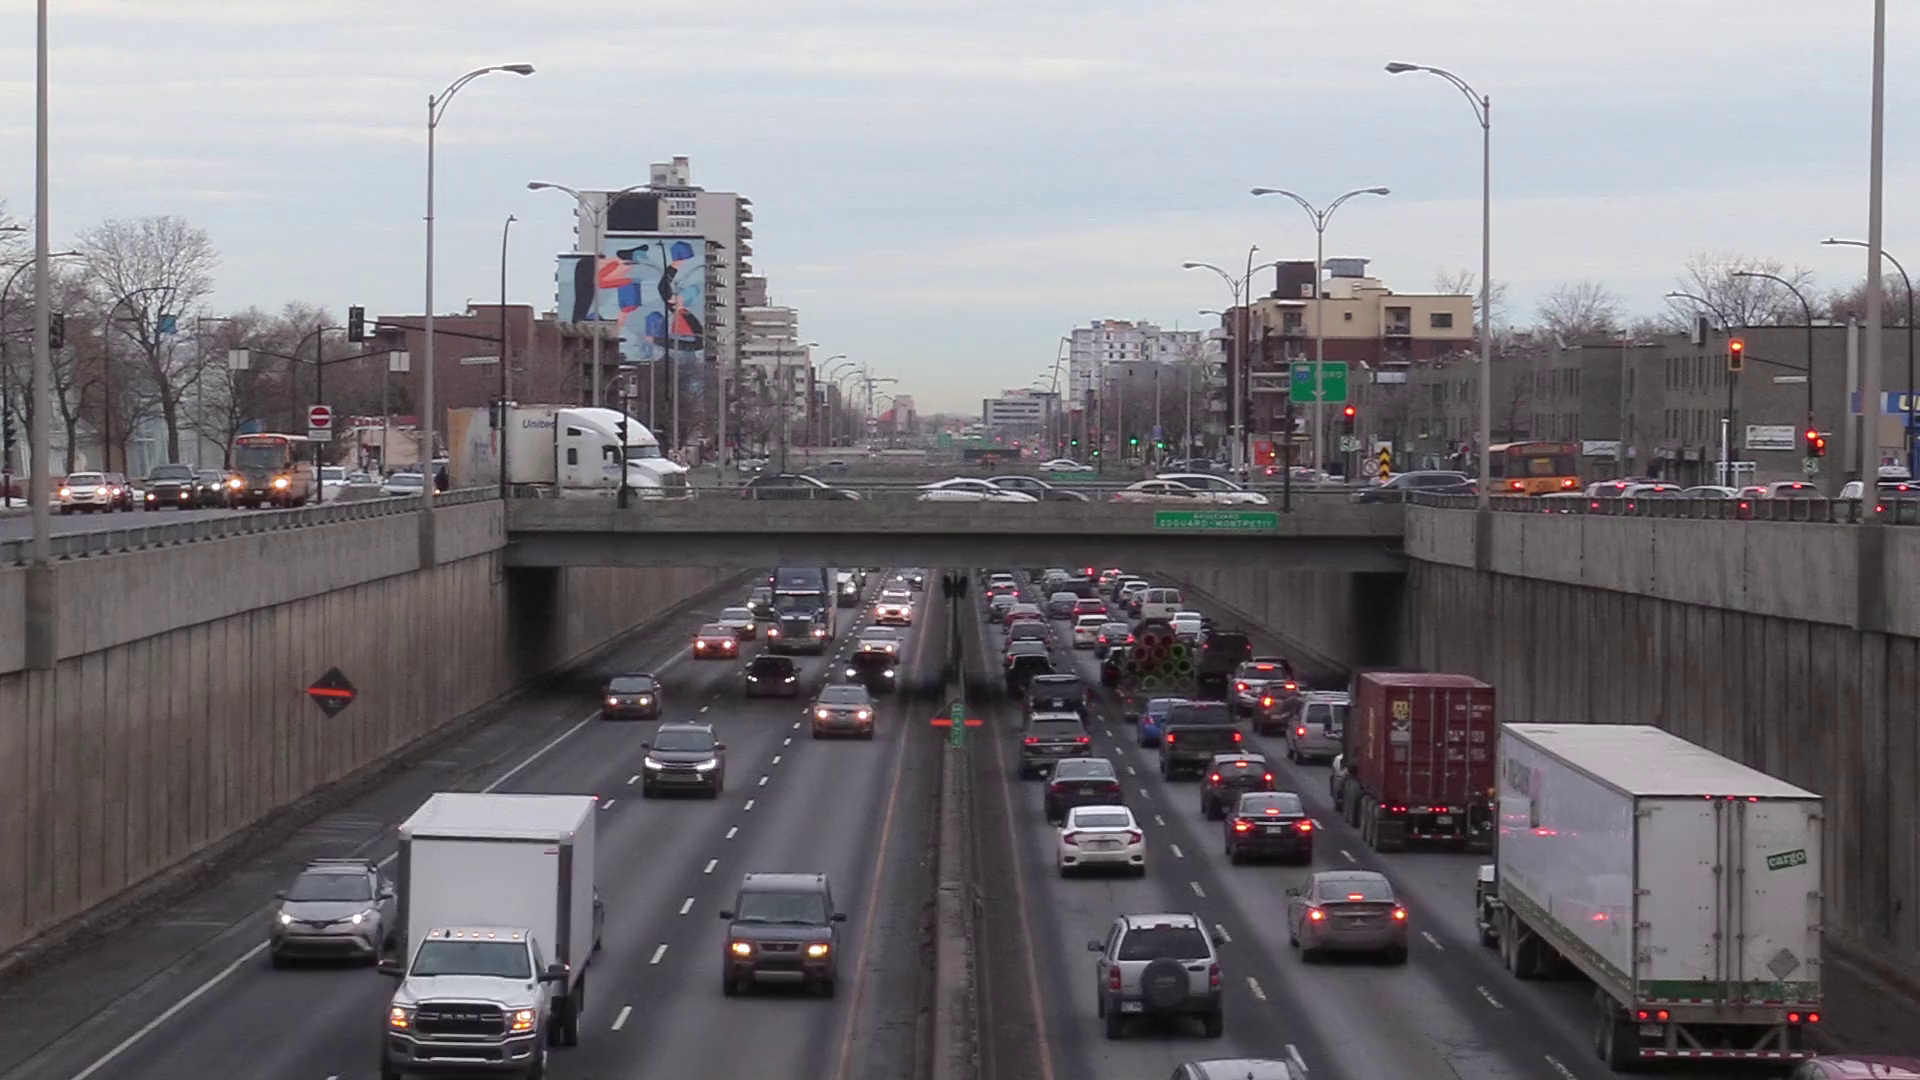

In [6]:
from google.colab.patches import cv2_imshow  # Required to display images in Colab

# extract one image from the video (frame)
generator = sv.get_video_frames_generator(VIDEO)
iterator = iter(generator) #loop over the frames

frame = next(iterator) #get the first frame

# save first frame
cv2.imwrite("first_frame.png", frame)
image = cv2.imread(f"{HOME}/first_frame.png")
#print(image)
cv2_imshow(image)

#Draw polygons
Using this tool from [Roboflow](https://roboflow.github.io/polygonzone/)


In [9]:
polygons = [
np.array([
[16, 1038],[692, 594],[936, 598],[840, 1066],[16, 1042]
]),
  np.array([
[1064, 1074],[960, 570],[1208, 566],[1896, 1062],[1052, 1070]
])
]

this code snippet creates a list of sv.PolygonZone objects, where each object represents a polygonal region of interest within a video frame. These zones are defined based on the provided list of polygons and the resolution of the video frames.

In [10]:
zones = [
    sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]

 this code snippet creates a list of sv.PolygonZoneAnnotator objects, where each annotator is associated with a specific polygonal region of interest (sv.PolygonZone). These annotators are configured with visualization properties such as color, thickness, and text settings.

In [11]:
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone,
        color=colors.by_idx(index),
        thickness=4,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]

this code snippet creates a list of sv.BoxAnnotator objects, where each annotator is associated with a specific index in the range of the number of polygons. These annotators are configured with visualization properties such as color, thickness, and text settings.

In [12]:
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index),
        thickness=4,
        text_thickness=4,
        text_scale=2
        )
    for index
    in range(len(polygons))
]


This function, process_frame, takes a frame (a NumPy array) and an index i as input and returns a processed frame as a NumPy array.



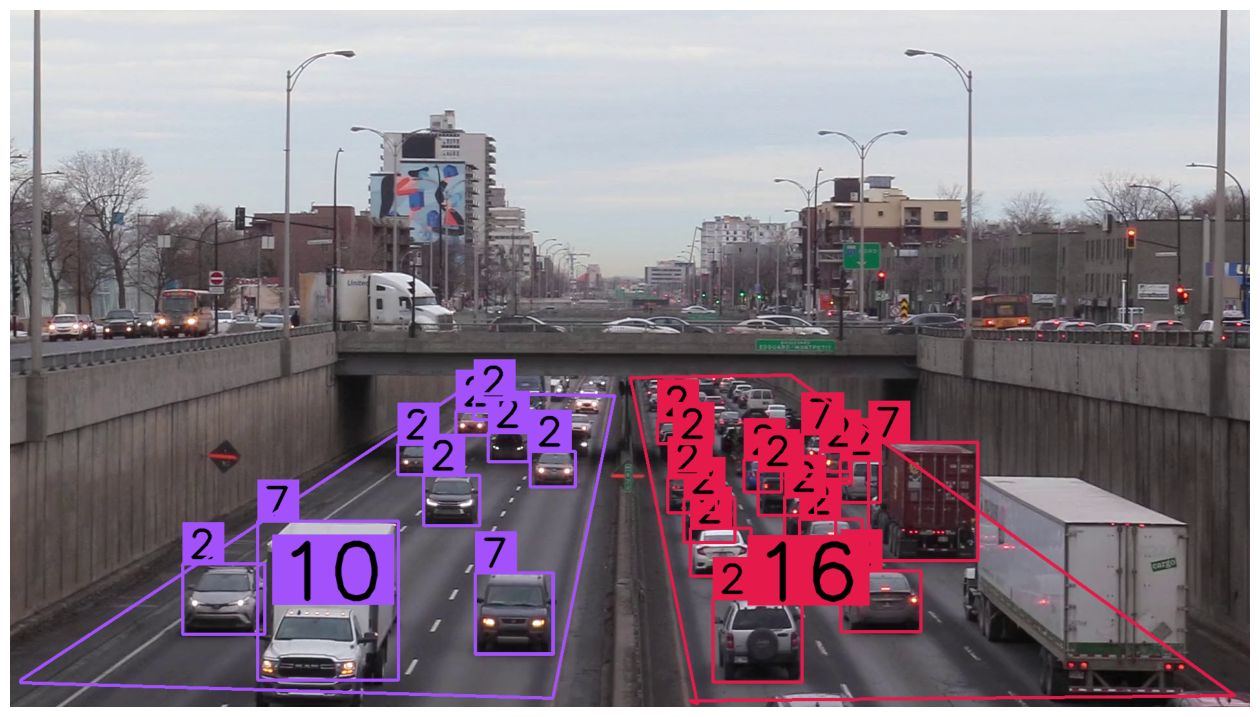

In [13]:
results = model(frame, imgsz=1280, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
    frame = zone_annotator.annotate(scene=frame)

sv.plot_image(frame, (16, 16))

In [14]:
def process_frame(frame: np.ndarray, i) -> np.ndarray:
    results = model(frame, imgsz=1280, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]
        frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=True)
        frame = zone_annotator.annotate(scene=frame)

    return frame

In [15]:
sv.process_video(source_path=VIDEO, target_path="result.mp4", callback=process_frame)